# COVID-19 in Mexico: Descriptive Visualizations

We show some general descriptive visualizations to understand in aggregate and state level the COVID-19 situation of Mexico.

In [136]:
import sys
sys.path.insert(1, './data/')
import get_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [322]:
covid = get_data.daily_data()
covid['death']= np.where(covid['fecha_def'].isnull(), 0,1)
covid['recovered'] = np.where((covid.fecha_ingreso + pd.DateOffset(days=30) < str(dt.date.today())) & \
                              (covid.death == 0),\
         1,0)
covid['fecha_r'] = covid.fecha_ingreso + pd.DateOffset(30)
covid.loc[covid.recovered == 0, 'fecha_r'] = np.nan

Requesting data to datos abiertos Mexico
Getting zip raw data into directory, will delete soon
Raw data deleted. If you specified filename, clean data will be saved in data directory


## National Level Counts

In [313]:
#Get national counts of daily cases, hospitalizations and deaths.
start = covid.groupby(['fecha_ingreso', 'resultado']).size().unstack().reset_index()
start_2 = covid.groupby(['fecha_ingreso', 'tipo_paciente']).size().unstack().reset_index()
death = covid.groupby(['fecha_def']).size().reset_index(name='deaths')
in_h = covid.groupby(['fecha_ingreso', 'tipo_paciente']).size().unstack().reset_index()
in_h = in_h.rename(columns={2:'in_hospital', 'fecha_ingreso': 'date'}).drop(columns=[1])
national = start.rename(columns={'fecha_ingreso': 'date'}).merge(death.rename(columns={'fecha_def': 'date'}), 
                                                                  how='outer').merge(in_h, how='outer')
national.rename(columns={1:'positive', 2:'negative', 3:'pending'}, inplace=True)
national = national.merge(pd.DataFrame(pd.date_range('2020-01-01', periods=150, freq='D'), columns=['date']), how='right')

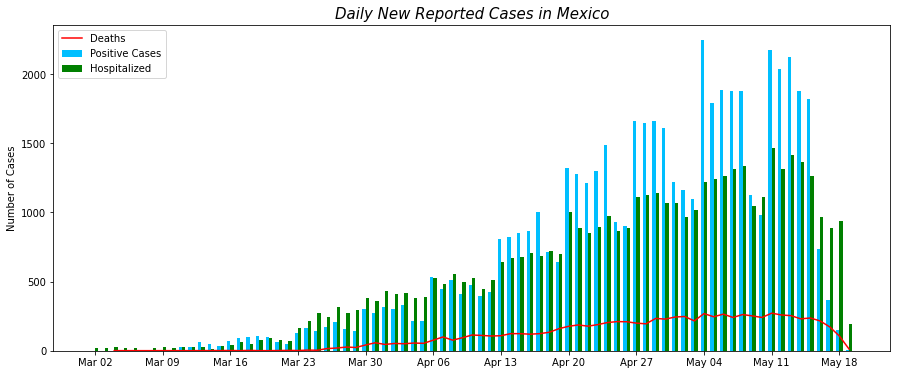

In [314]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,6))
sub = national[national.date > '2020-03-01']
width = 0.35 
plt.bar(sub.date, sub['positive'], -width, align="edge", label='Positive Cases', color='deepskyblue')
plt.bar(sub.date, sub['in_hospital'], +width, align="edge", label='Hospitalized', color='green')
sns.lineplot(x=sub.date, y=sub['deaths'],label='Deaths', color='red')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel('')
plt.ylabel('Number of Cases')
plt.title('Daily New Reported Cases in Mexico', size=15, style='italic')
plt.legend(loc='upper left')
plt.show()

In [315]:
#Compute daily number of estimated recovered cases
recovered = covid.groupby(['fecha_r', 'recovered']).size().reset_index(name='recovered_c').\
rename(columns={'fecha_r':'date'})
recovered = recovered[recovered['recovered'] == 1]
recovered.drop(columns='recovered', inplace=True)
sub = sub.merge(recovered)

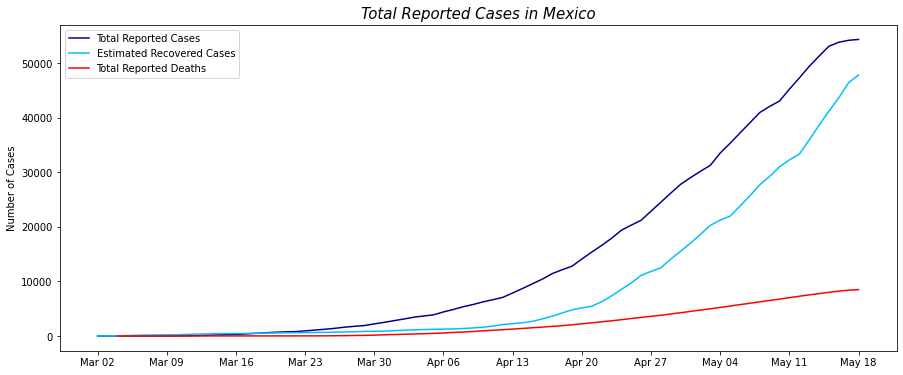

In [316]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x=sub.date, y=sub.positive.cumsum(), color='darkblue', label='Total Reported Cases')
sns.lineplot(x=sub.date, y=sub.recovered_c.cumsum(), color='deepskyblue', label='Estimated Recovered Cases')
sns.lineplot(x=sub.date, y=sub.deaths.cumsum(), color='red', label='Total Reported Deaths')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel('')
plt.ylabel('Number of Cases')
plt.title('Total Reported Cases in Mexico', size=15, style='italic')
plt.show()

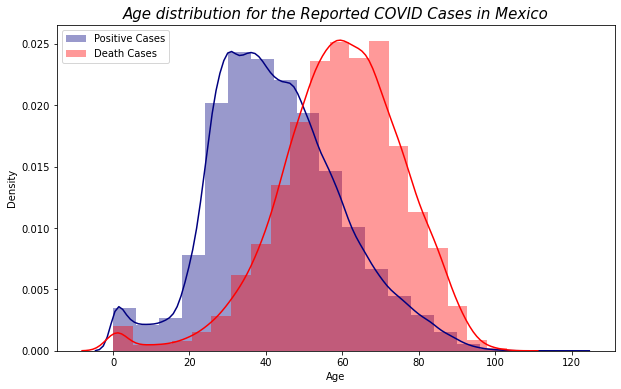

In [338]:
#Plot age distributions for the reported positive cases and deaths 
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(covid.edad, bins=20, kde=True, color='navy', label='Positive Cases')
sns.distplot(covid[covid.death == 1].edad, bins=20, kde=True, color='red', label='Death Cases')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution for the Reported COVID Cases in Mexico', size=15, style='italic')
plt.legend(loc='upper left')
plt.show()